# NYC 311 Service Request Analysis

-------------------------------------------------------------------------------------------------------------------------------

- Import a 311 NYC service request


- Basic data exploratory analysis 
 
      - Explore data

      - Find patterns
 
      - Display the complaint type and city together
      
- Find major complaint types

      - Find the top 10 complaint types 

      - Plot a bar graph of count vs. complaint types
      
- Visualize the complaint types

      - Display the major complaint types and their count


###  Background of Problem Statement :


          -  NYC 311's mission is to provide the public with quick and easy access to all New York City government
           
             services and information while offering the best customer service. Each day, NYC311 receives thousands
             
             of requests related to several hundred types of non-emergency services, including noise complaints,
             
             plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the
             
             relevant agencies such as the police, buildings, or transportation. The agency responds to the request,
             
             addresses it, and then closes it.

###  Analysis Tasks to be performed:


            (Perform a service request data analysis of New York City 311 calls) 
            

             1.	Import a 311 NYC service request.
             
             
             2.	Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create
             
                a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request
                
                closing. (Hint: Explore the package/module datetime)
                 

             3.	Provide major insights/patterns that you can offer in a visual format (graphs or tables);
             
                at least 4 major conclusions that you can come up with after generic data mining.
                

             4.	Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for
             
                different locations.
                

             5.	Perform a statistical test for the following:
             

                  Note: For the below statements you need to state the Null and Alternate and then provide
                  
                  a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
                  

                          •	Whether the average response time across complaint types is similar or not (overall)
                     
                          •	Are the type of complaint or service requested and location related?


###  Problem Objective :

           - Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling 
           
             techniques to understand the pattern in the data and also visualize the major complaint types.

In [86]:
import numpy as np
import pandas as pd

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [87]:
url = 'C:/Users/deepusuresh/Documents/Data Science/01. Python/1. Project/1. Certificate_Project/2. Customer Service Requests Analysis'

df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
pd.options.display.max_columns = None
df.head()

C:\Users\deepusuresh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
df.shape

(364558, 53)

In [4]:
# get the column names of NYC data

df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
# get the row names of NYC data

df.index
df.index.values

array([     0,      1,      2, ..., 364555, 364556, 364557], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

In [7]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [8]:
# checking for total null values
# axis = 0 for column wise analysis

print(df.isnull().sum(axis = 0))

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [9]:
# how many variables in an observation have null values

print(df.isnull().sum(axis = 1))

0         14
1         14
2         14
3         14
4         14
5         14
6         14
7         14
8         14
9         14
10        14
11        14
12        14
13        14
14        14
15        14
16        14
17        14
18        14
19        14
20        14
21        14
22        14
23        14
24        14
25        14
26        14
27        14
28        14
29        14
          ..
364528    14
364529    14
364530    16
364531    14
364532    14
364533    14
364534    14
364535    14
364536    17
364537    14
364538    14
364539    14
364540    14
364541    14
364542    14
364543    14
364544    14
364545    14
364546    14
364547    14
364548    14
364549    16
364550    14
364551    16
364552    16
364553    14
364554    14
364555    14
364556    14
364557    14
Length: 364558, dtype: int64


In [10]:
# getting the descriptive statistics of the numerical attributes of the dataset

df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [14]:
df.corr()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
Unique Key,1.000000,-0.008518,-0.018941,-0.004725,NaN,NaN,NaN,NaN,NaN,-0.004710,-0.018951
Incident Zip,-0.008518,1.000000,0.395480,-0.489262,NaN,NaN,NaN,NaN,NaN,-0.489519,0.394825
X Coordinate (State Plane),-0.018941,0.395480,1.000000,0.373616,NaN,NaN,NaN,NaN,NaN,0.373100,0.999999
Y Coordinate (State Plane),-0.004725,-0.489262,0.373616,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.374573
School or Citywide Complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxi Company Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxi Pick Up Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Lot Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,-0.004710,-0.489519,0.373100,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.374057


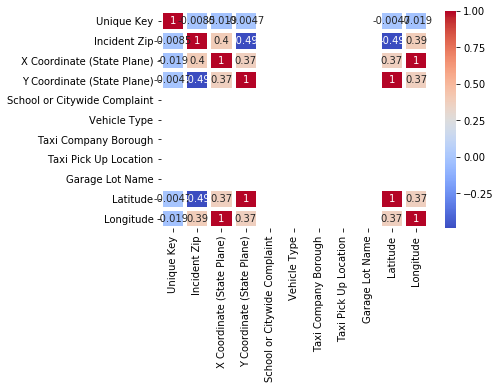

In [15]:
sns.heatmap(df.corr(), annot=True, linewidths=3, cmap='coolwarm')

#### 1. convert the columns ‘Created Date’ and Closed Date’ to datetime datatyp
#### 2. create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [16]:
# import datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [17]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [18]:
# New Column added at the end of dataset : "Request_Closing_Time"

df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

In [19]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [20]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [21]:
df['Created Date']

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
5        2015-12-31 23:56:30
6        2015-12-31 23:55:32
7        2015-12-31 23:54:05
8        2015-12-31 23:53:58
9        2015-12-31 23:53:58
10       2015-12-31 23:52:58
11       2015-12-31 23:50:57
12       2015-12-31 23:48:03
13       2015-12-31 23:47:58
14       2015-12-31 23:47:37
15       2015-12-31 23:47:30
16       2015-12-31 23:47:02
17       2015-12-31 23:44:52
18       2015-12-31 23:40:59
19       2015-12-31 23:40:55
20       2015-12-31 23:40:43
21       2015-12-31 23:38:51
22       2015-12-31 23:34:18
23       2015-12-31 23:32:46
24       2015-12-31 23:31:40
25       2015-12-31 23:30:28
26       2015-12-31 23:26:41
27       2015-12-31 23:26:35
28       2015-12-31 23:25:56
29       2015-12-31 23:25:01
                 ...        
364528   2015-01-01 00:42:58
364529   2015-01-01 00:42:39
364530   2015-01-01 00:37:13
364531   2015-

In [91]:
df.drop(['Unique Key', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
         'Intersection Street 1', 'Intersection Street 2', 'X Coordinate (State Plane)', 'School Name',
         'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address',
         'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint',
         'Vehicle Type','Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
         'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name',
         'Ferry Direction', 'Ferry Terminal Name', 'Resolution Description',
         'Resolution Action Updated Date', 'Community Board'], axis=1, inplace=True)

In [23]:
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Landmark,Facility Type,Status,Due Date,Borough,Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,BRONX,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,QUEENS,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [24]:
df.drop(['Closed Date','Created Date'], axis=1, inplace=True)

In [25]:
df.head()

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Landmark,Facility Type,Status,Due Date,Borough,Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,BRONX,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,QUEENS,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [26]:
df.shape

(364558, 20)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 20 columns):
Agency                        364558 non-null object
Agency Name                   364558 non-null object
Complaint Type                364558 non-null object
Descriptor                    358057 non-null object
Location Type                 364425 non-null object
Incident Zip                  361560 non-null float64
Address Type                  361306 non-null object
City                          361561 non-null object
Landmark                      375 non-null object
Facility Type                 362169 non-null object
Status                        364558 non-null object
Due Date                      364555 non-null object
Borough                       364558 non-null object
Y Coordinate (State Plane)    360528 non-null float64
Park Facility Name            364558 non-null object
Park Borough                  364558 non-null object
Latitude                      360528 non-n

In [28]:
df.isnull().sum()

Agency                             0
Agency Name                        0
Complaint Type                     0
Descriptor                      6501
Location Type                    133
Incident Zip                    2998
Address Type                    3252
City                            2997
Landmark                      364183
Facility Type                   2389
Status                             0
Due Date                           3
Borough                            0
Y Coordinate (State Plane)      4030
Park Facility Name                 0
Park Borough                       0
Latitude                        4030
Longitude                       4030
Location                        4030
Request_Closing_Time            2381
dtype: int64

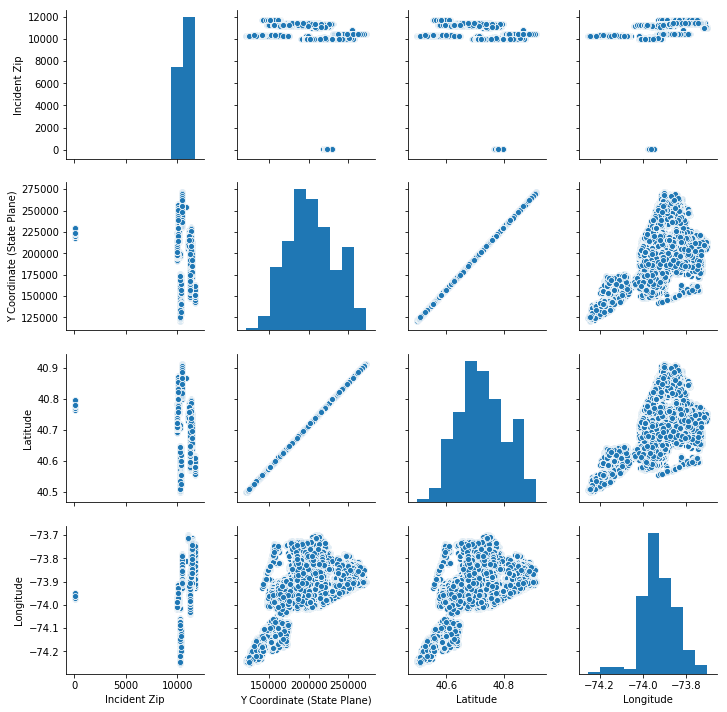

In [92]:
sns.pairplot(df)

In [93]:
df.corr()

,Incident Zip,Y Coordinate (State Plane),Latitude,Longitude
Incident Zip,1.000000,-0.489262,-0.489519,0.394825
Y Coordinate (State Plane),-0.489262,1.000000,1.000000,0.374573
Latitude,-0.489519,1.000000,1.000000,0.374057
Longitude,0.394825,0.374573,0.374057,1.000000


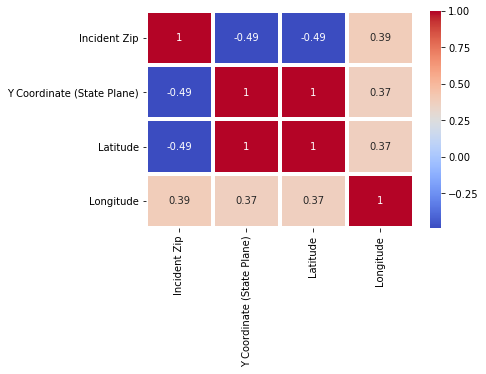

In [94]:
sns.heatmap(df.corr(), annot=True, linewidths=3, cmap='coolwarm')

### To get the top 10 complaints by type

### 1. Agency Name

In [29]:
# to get the counts of a categorical column

df['Agency'].value_counts()

NYPD    364558
Name: Agency, dtype: int64

In [30]:
df['Agency Name'].value_counts()

New York City Police Department    364548
Internal Affairs Bureau                 8
NYPD                                    2
Name: Agency Name, dtype: int64

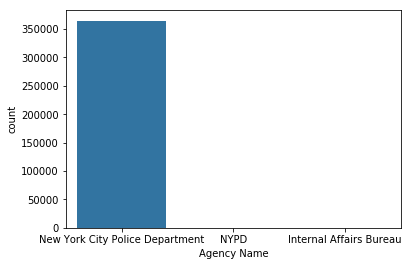

In [31]:
sns.countplot(df['Agency Name'])

### 2. Complaint Type

In [32]:
# to see the distribution of the complaint type

df['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Derelict Vehicle'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Noise - House of Worship'),
 Text(0, 0, 'Posting Advertisement'),
 Text(0, 0, 'Noise - Vehicle'),
 Text(0, 0, 'Animal Abuse'),
 Text(0, 0, 'Vending'),
 Text(0, 0, 'Traffic'),
 Text(0, 0, 'Drinking'),
 Text(0, 0, 'Bike/Roller/Skate Chronic'),
 Text(0, 0, 'Panhandling'),
 Text(0, 0, 'Noise - Park'),
 Text(0, 0, 'Homeless Encampment'),
 Text(0, 0, 'Urinating in Public'),
 Text(0, 0, 'Graffiti'),
 Text(0, 0, 'Disorderly Youth'),
 Text(0, 0, 'Illegal Fireworks'),
 Text(0, 0, 'Ferry Complaint'),
 Text(0, 0, 'Agency Issues'),
 Text(0, 0, 'Squeegee'),
 Text(0, 0, 'Animal in a Park')]

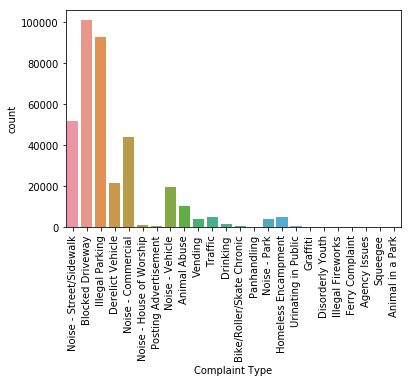

In [34]:
plot = sns.countplot(df['Complaint Type'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

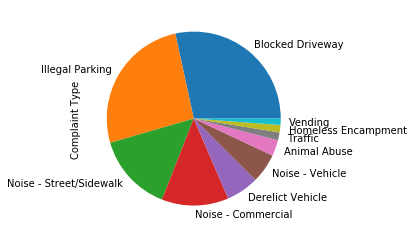

In [35]:
df['Complaint Type'].value_counts().head(10).plot(kind = 'pie')

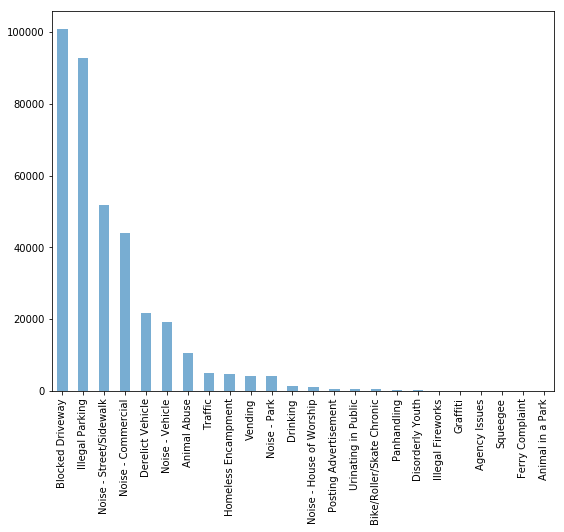

In [36]:
# complaint type breakdown with bar plot to figure out majority of complaint types and top 10 complaints 

df['Complaint Type'].value_counts().plot(kind = 'bar', alpha=0.6,figsize = (9,7))

### 3. Descriptor

In [37]:
df['Descriptor'].value_counts()

No Access                         75888
Loud Music/Party                  69708
Posted Parking Sign Violation     27200
Partial Access                    24993
Loud Talking                      23810
With License Plate                21661
Blocked Hydrant                   19989
Commercial Overnight Parking      14997
Blocked Sidewalk                  13860
Car/Truck Music                   11940
Double Parked Blocking Traffic     7164
Engine Idling                      5323
Double Parked Blocking Vehicle     5167
Neglected                          5131
Banging/Pounding                   4959
Car/Truck Horn                     4478
Congestion/Gridlock                3237
Other (complaint details)          2489
In Prohibited Area                 2206
Overnight Commercial Storage       2102
Unlicensed                         1986
Unauthorized Bus Layover           1618
Truck Route Violation              1125
Tortured                           1041
In Public                           971


[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Derelict Vehicle'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Noise - House of Worship'),
 Text(0, 0, 'Posting Advertisement'),
 Text(0, 0, 'Noise - Vehicle'),
 Text(0, 0, 'Animal Abuse'),
 Text(0, 0, 'Vending'),
 Text(0, 0, 'Traffic'),
 Text(0, 0, 'Drinking'),
 Text(0, 0, 'Bike/Roller/Skate Chronic'),
 Text(0, 0, 'Panhandling'),
 Text(0, 0, 'Noise - Park'),
 Text(0, 0, 'Homeless Encampment'),
 Text(0, 0, 'Urinating in Public'),
 Text(0, 0, 'Graffiti'),
 Text(0, 0, 'Disorderly Youth'),
 Text(0, 0, 'Illegal Fireworks'),
 Text(0, 0, 'Ferry Complaint'),
 Text(0, 0, 'Agency Issues'),
 Text(0, 0, 'Squeegee'),
 Text(0, 0, 'Animal in a Park')]

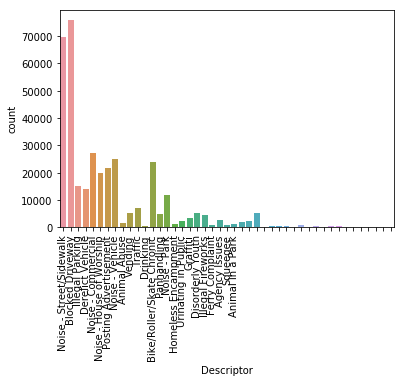

In [38]:
plot2 = sns.countplot(df['Descriptor'])
plot2.set_xticklabels(plot.get_xticklabels(),rotation=90)

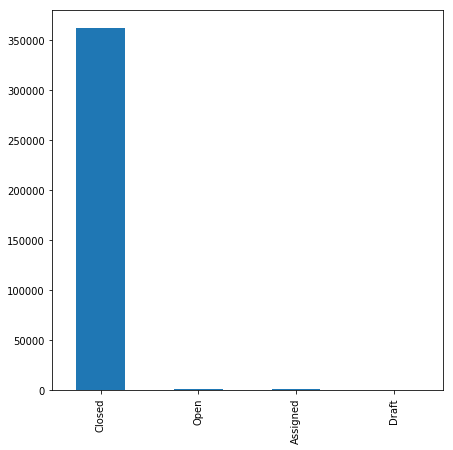

In [37]:
# analysis of the status of tickets which have been filed

df['Status'].value_counts().plot(kind='bar', figsize=(7,7))

### 4. Location Type

In [39]:
df['Location Type'].value_counts().head()

Street/Sidewalk               301372
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
Name: Location Type, dtype: int64

[Text(0, 0, 'Street/Sidewalk'),
 Text(0, 0, 'Club/Bar/Restaurant'),
 Text(0, 0, 'Store/Commercial'),
 Text(0, 0, 'House of Worship'),
 Text(0, 0, 'Residential Building/House'),
 Text(0, 0, 'Residential Building'),
 Text(0, 0, 'Park/Playground'),
 Text(0, 0, 'Vacant Lot'),
 Text(0, 0, 'House and Store'),
 Text(0, 0, 'Highway'),
 Text(0, 0, 'Commercial'),
 Text(0, 0, 'Roadway Tunnel'),
 Text(0, 0, 'Subway Station'),
 Text(0, 0, 'Parking Lot'),
 Text(0, 0, 'Bridge'),
 Text(0, 0, 'Terminal'),
 Text(0, 0, 'Ferry'),
 Text(0, 0, 'Park')]

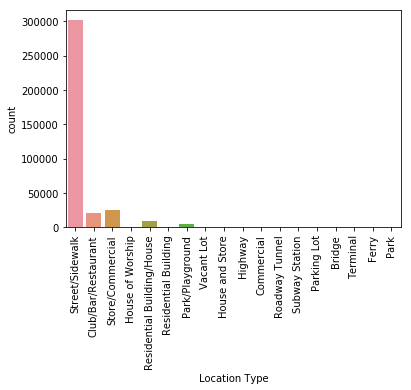

In [40]:
df['Location Type'].fillna(value='Street/Sidewalk',inplace =True)
plot3=sns.countplot(df['Location Type'])
plot3.set_xticklabels(plot3.get_xticklabels(),rotation=90)

### 5. Incident Zip

In [41]:
df['Incident Zip'].value_counts().head()

11385.0    6396
11368.0    5384
11234.0    5199
11211.0    4854
11377.0    4525
Name: Incident Zip, dtype: int64

In [45]:
df['Incident Zip'].fillna(value=11385,inplace=True)

### 6. Address Type

In [46]:
df['Address Type'].value_counts()

ADDRESS         292699
INTERSECTION     50514
BLOCKFACE        13786
LATLONG           3931
PLACENAME          376
Name: Address Type, dtype: int64

[Text(0, 0, 'ADDRESS'),
 Text(0, 0, 'Address'),
 Text(0, 0, 'INTERSECTION'),
 Text(0, 0, 'LATLONG'),
 Text(0, 0, 'BLOCKFACE'),
 Text(0, 0, 'PLACENAME')]

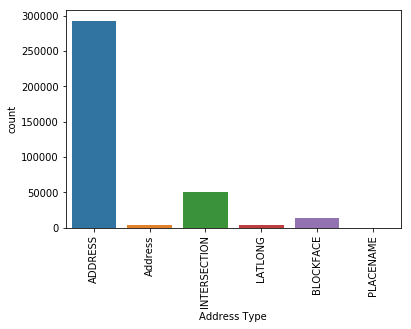

In [48]:
df['Address Type'].fillna(value='Address',inplace=True)
plot4 = sns.countplot(df['Address Type'])
plot4.set_xticklabels(plot4.get_xticklabels(),rotation=90)

In [52]:
df.drop(['Latitude', 'Longitude', 'Location', 'Y Coordinate (State Plane)', 'Landmark'], axis=1, inplace=True)

KeyError: "['Latitude' 'Longitude' 'Location' 'Y Coordinate (State Plane)' 'Landmark'] not found in axis"

### 7. City

In [53]:
df['City'].value_counts().head()

BROOKLYN         118862
NEW YORK          77312
BRONX             49171
STATEN ISLAND     15340
JAMAICA            8932
Name: City, dtype: int64

In [54]:
df['Facility Type'].value_counts().head()

Precinct    362169
Name: Facility Type, dtype: int64

In [55]:
df['City'].fillna(value='BROOKLYN',inplace=True)
df['City'].value_counts().head()

BROOKLYN         121859
NEW YORK          77312
BRONX             49171
STATEN ISLAND     15340
JAMAICA            8932
Name: City, dtype: int64

[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Derelict Vehicle'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Noise - House of Worship'),
 Text(0, 0, 'Posting Advertisement'),
 Text(0, 0, 'Noise - Vehicle'),
 Text(0, 0, 'Animal Abuse'),
 Text(0, 0, 'Vending'),
 Text(0, 0, 'Traffic'),
 Text(0, 0, 'Drinking'),
 Text(0, 0, 'Bike/Roller/Skate Chronic'),
 Text(0, 0, 'Panhandling'),
 Text(0, 0, 'Noise - Park'),
 Text(0, 0, 'Homeless Encampment'),
 Text(0, 0, 'Urinating in Public'),
 Text(0, 0, 'Graffiti'),
 Text(0, 0, 'Disorderly Youth'),
 Text(0, 0, 'Illegal Fireworks'),
 Text(0, 0, 'Ferry Complaint'),
 Text(0, 0, 'Agency Issues'),
 Text(0, 0, 'Squeegee'),
 Text(0, 0, 'Animal in a Park')]

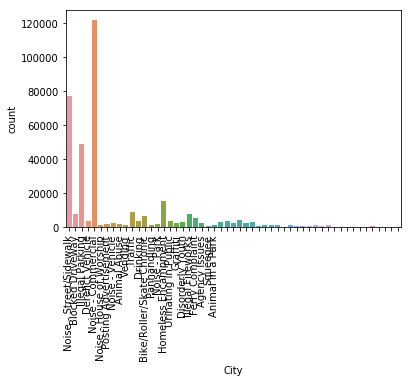

In [56]:
plot5 = sns.countplot(x=df['City'])
plot5.set_xticklabels(plot.get_xticklabels(),rotation=90)

### 8. Request_Closing_Time

In [57]:
df['Request_Closing_Time'].head()

0   00:55:30
1   01:27:13
2   04:51:34
3   07:45:27
4   03:27:44
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [58]:
df['Request_Closing_Time'].fillna(value=df['Request_Closing_Time'].mean(),inplace=True)

In [59]:
df['Request_Closing_Time'].isna().sum()

0

### 9. Status

In [61]:
df['Status'].value_counts()

Closed      362114
Open          1640
Assigned       802
Draft            2
Name: Status, dtype: int64

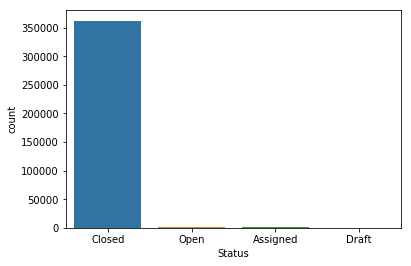

In [62]:
sns.countplot(df['Status'])

In [63]:
desc = df.groupby(by='Complaint Type')['Descriptor'].agg('count')
desc

Complaint Type
Agency Issues                     8
Animal Abuse                  10541
Animal in a Park                  1
Bike/Roller/Skate Chronic         0
Blocked Driveway             100881
Derelict Vehicle              21661
Disorderly Youth                315
Drinking                       1409
Ferry Complaint                   2
Graffiti                        157
Homeless Encampment               0
Illegal Fireworks                 0
Illegal Parking               92679
Noise - Commercial            44109
Noise - House of Worship       1070
Noise - Park                   4109
Noise - Street/Sidewalk       51692
Noise - Vehicle               19352
Panhandling                       0
Posting Advertisement           681
Squeegee                          0
Traffic                        5198
Urinating in Public               0
Vending                        4192
Name: Descriptor, dtype: int64

In [64]:
# City with their status
df.loc[df['City']=='NEW YORK',]['Borough'].value_counts()

MANHATTAN    77308
QUEENS           3
BROOKLYN         1
Name: Borough, dtype: int64

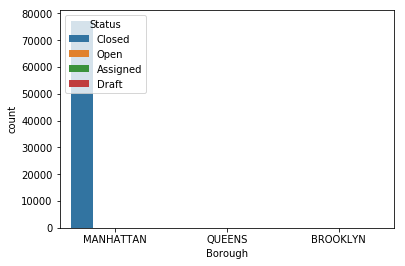

In [65]:
# Newyork city has how many boroughs and whats their status 

sns.countplot(x=df.loc[df['City']=='NEW YORK',]['Borough'], hue='Status', data=df)

In [66]:
# Newyork city has max complaints of which complaint type?

df.loc[df['City']=='NEW YORK',:]['Complaint Type'].value_counts()

Noise - Street/Sidewalk      22252
Noise - Commercial           18692
Illegal Parking              14553
Noise - Vehicle               6295
Homeless Encampment           3060
Blocked Driveway              2707
Vending                       2639
Animal Abuse                  1941
Traffic                       1770
Noise - Park                  1244
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Noise - House of Worship'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Vending'),
 Text(0, 0, 'Noise - Vehicle'),
 Text(0, 0, 'Panhandling'),
 Text(0, 0, 'Animal Abuse'),
 Text(0, 0, 'Noise - Park'),
 Text(0, 0, 'Homeless Encampment'),
 Text(0, 0, 'Traffic'),
 Text(0, 0, 'Derelict Vehicle'),
 Text(0, 0, 'Drinking'),
 Text(0, 0, 'Urinating in Public'),
 Text(0, 0, 'Bike/Roller/Skate Chronic'),
 Text(0, 0, 'Graffiti'),
 Text(0, 0, 'Posting Advertisement'),
 Text(0, 0, 'Disorderly Youth'),
 Text(0, 0, 'Illegal Fireworks'),
 Text(0, 0, 'Squeegee')]

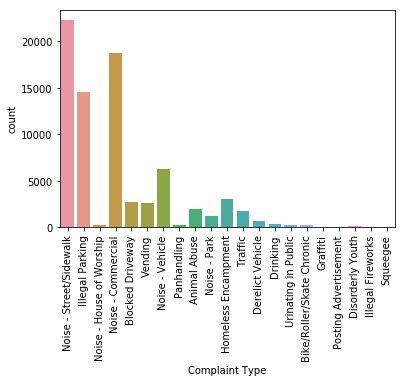

In [67]:
plot = sns.countplot(x=df.loc[df['City']=='NEW YORK',:]['Complaint Type'])
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)

In [68]:
# Avg time taken to solve a case in Newyork city

df.loc[(df['City']=='NEW YORK')&(df['Status']=='Closed'),:]['Request_Closing_Time'].mean()

Timedelta('0 days 02:55:17.417518')

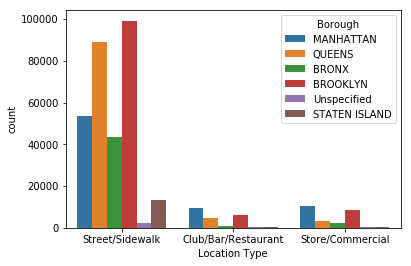

In [69]:
# Top Location type and their countplot with hues='Borough'

sns.countplot(df.loc[df['Location Type'].isin(['Street/Sidewalk','Store/Commercial','Club/Bar/Restaurant'])]
              ['Location Type'],data=d,hue='Borough')

In [71]:
import datetime
df['year'] = pd.DatetimeIndex(df['Due Date']).year
df.head()

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Borough,Park Facility Name,Park Borough,Request_Closing_Time,year
0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,Unspecified,MANHATTAN,00:55:30,2016.0
1,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,Unspecified,QUEENS,01:27:13,2016.0
2,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,Unspecified,BRONX,04:51:34,2016.0
3,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:57:46 AM,BRONX,Unspecified,BRONX,07:45:27,2016.0
4,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01/01/2016 07:56:58 AM,QUEENS,Unspecified,QUEENS,03:27:44,2016.0


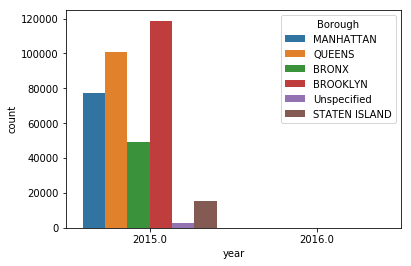

In [72]:
sns.countplot(df['year'], hue='Borough', data=df)

In [73]:
df['Location Type'].value_counts()

Street/Sidewalk               301505
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
House of Worship                1068
Residential Building             533
Highway                          265
House and Store                  245
Parking Lot                      167
Commercial                       108
Vacant Lot                        95
Roadway Tunnel                    43
Subway Station                    40
Bridge                             2
Terminal                           1
Park                               1
Ferry                              1
Name: Location Type, dtype: int64

In [74]:
# Display the complaint type and city together

df[['Complaint Type','City']].head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


In [75]:
# Find the top 10 complaint types

df['Complaint Type'].value_counts()[0:10,]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Street/Sidewalk'),
 Text(0, 0, 'Club/Bar/Restaurant'),
 Text(0, 0, 'Store/Commercial'),
 Text(0, 0, 'House of Worship'),
 Text(0, 0, 'Residential Building/House'),
 Text(0, 0, 'Residential Building'),
 Text(0, 0, 'Park/Playground'),
 Text(0, 0, 'Vacant Lot'),
 Text(0, 0, 'House and Store'),
 Text(0, 0, 'Highway'),
 Text(0, 0, 'Commercial'),
 Text(0, 0, 'Roadway Tunnel'),
 Text(0, 0, 'Subway Station'),
 Text(0, 0, 'Parking Lot'),
 Text(0, 0, 'Bridge'),
 Text(0, 0, 'Terminal'),
 Text(0, 0, 'Ferry'),
 Text(0, 0, 'Park')]

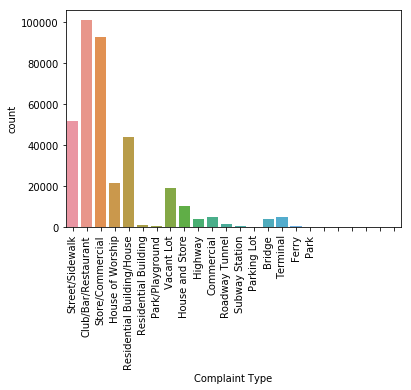

In [76]:
# Plot a bar graph of count vs. complaint types

plot6 = sns.countplot(df['Complaint Type'])
plot6.set_xticklabels(plot3.get_xticklabels(),rotation =90)

In [77]:
# Display the major complaint types and their count
# top 5 complaint types

series = df['Complaint Type'].value_counts()[0:5,]
series.nlargest().index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

[Text(0, 0, 'Street/Sidewalk'),
 Text(0, 0, 'Club/Bar/Restaurant'),
 Text(0, 0, 'Store/Commercial'),
 Text(0, 0, 'House of Worship'),
 Text(0, 0, 'Residential Building/House')]

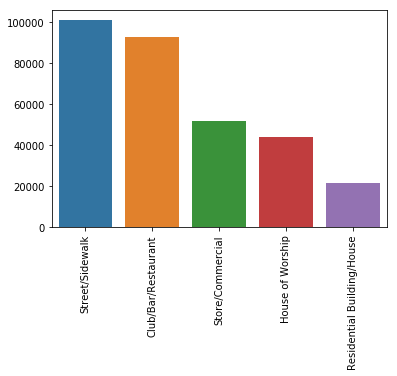

In [78]:
plot7 = sns.barplot(x=series.nlargest().index,y=series.nlargest().values)
plot7.set_xticklabels(plot3.get_xticklabels(),rotation =90)

# Display the complaint type and city together

In [80]:
# Grouping by the city and the complaint type

city_comp = df.groupby(['City','Complaint Type']).size()
city_comp

City       Complaint Type           
ARVERNE    Animal Abuse                   46
           Blocked Driveway               50
           Derelict Vehicle               32
           Disorderly Youth                2
           Drinking                        1
           Graffiti                        1
           Homeless Encampment             4
           Illegal Parking                62
           Noise - Commercial              2
           Noise - House of Worship       14
           Noise - Park                    2
           Noise - Street/Sidewalk        29
           Noise - Vehicle                10
           Panhandling                     1
           Traffic                         1
           Urinating in Public             1
           Vending                         1
ASTORIA    Animal Abuse                  170
           Bike/Roller/Skate Chronic      16
           Blocked Driveway             3436
           Derelict Vehicle              426
           Disorde

In [81]:
city_time = df.groupby(['City','Request_Closing_Time']).size()
city_time

City      Request_Closing_Time
ARVERNE   0 days 00:12:06         1
          0 days 00:12:58         1
          0 days 00:14:19         1
          0 days 00:17:44         1
          0 days 00:18:21         1
          0 days 00:19:56         1
          0 days 00:20:05         1
          0 days 00:22:49         1
          0 days 00:23:40         1
          0 days 00:24:59         1
          0 days 00:25:48         1
          0 days 00:26:54         1
          0 days 00:27:56         1
          0 days 00:28:10         1
          0 days 00:28:19         1
          0 days 00:28:55         1
          0 days 00:29:14         1
          0 days 00:33:09         1
          0 days 00:33:48         1
          0 days 00:34:43         1
          0 days 00:36:05         1
          0 days 00:36:06         1
          0 days 00:37:56         1
          0 days 00:39:36         1
          0 days 00:39:56         1
          0 days 00:40:11         1
          0 days 00:41:31        

In [82]:
# in order to get the count by the complaint type, use unstack

city_comp.unstack()

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,46.0,NaN,NaN,50.0,32.0,2.0,1.0,NaN,1.0,4.0,NaN,62.0,2.0,14.0,2.0,29.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,NaN,170.0,NaN,16.0,3436.0,426.0,5.0,43.0,NaN,4.0,32.0,4.0,1340.0,1653.0,21.0,64.0,409.0,236.0,2.0,3.0,NaN,60.0,10.0,57.0
Astoria,NaN,NaN,NaN,NaN,159.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,277.0,311.0,NaN,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,NaN,53.0,NaN,NaN,514.0,231.0,2.0,1.0,NaN,3.0,2.0,NaN,638.0,47.0,3.0,4.0,17.0,24.0,NaN,NaN,NaN,9.0,NaN,2.0
BELLEROSE,NaN,15.0,NaN,1.0,138.0,120.0,2.0,1.0,NaN,NaN,1.0,1.0,132.0,38.0,1.0,1.0,13.0,11.0,1.0,1.0,NaN,9.0,1.0,NaN
BREEZY POINT,NaN,2.0,NaN,NaN,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,16.0,4.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,1971.0,NaN,22.0,17063.0,2403.0,66.0,206.0,NaN,15.0,275.0,24.0,9889.0,2945.0,90.0,548.0,9146.0,3556.0,20.0,18.0,NaN,427.0,54.0,433.0
BROOKLYN,8.0,3203.0,NaN,129.0,36780.0,6460.0,79.0,299.0,2.0,60.0,949.0,61.0,34800.0,14282.0,391.0,1601.0,14622.0,6024.0,52.0,59.0,NaN,1261.0,155.0,582.0
CAMBRIA HEIGHTS,NaN,15.0,NaN,NaN,177.0,148.0,NaN,NaN,NaN,NaN,6.0,1.0,113.0,19.0,2.0,NaN,29.0,100.0,NaN,NaN,NaN,7.0,NaN,NaN


In [83]:
# to get the total number of complaints for each city

a = city_comp.unstack().sum(axis=1)
a

City
ARVERNE                   259.0
ASTORIA                  7991.0
Astoria                   906.0
BAYSIDE                  1550.0
BELLEROSE                 487.0
BREEZY POINT               31.0
BRONX                   49171.0
BROOKLYN               121859.0
CAMBRIA HEIGHTS           617.0
CENTRAL PARK              110.0
COLLEGE POINT            1544.0
CORONA                   5383.0
EAST ELMHURST            3558.0
ELMHURST                 3438.0
East Elmhurst              30.0
FAR ROCKAWAY             1397.0
FLORAL PARK               196.0
FLUSHING                 7487.0
FOREST HILLS             2122.0
FRESH MEADOWS            2453.0
GLEN OAKS                 361.0
HOLLIS                   1231.0
HOWARD BEACH             1144.0
Howard Beach                1.0
JACKSON HEIGHTS          2106.0
JAMAICA                  8932.0
KEW GARDENS              1008.0
LITTLE NECK               712.0
LONG ISLAND CITY         3028.0
Long Island City          170.0
MASPETH                  3118.0
MID

# To get the complaints by city

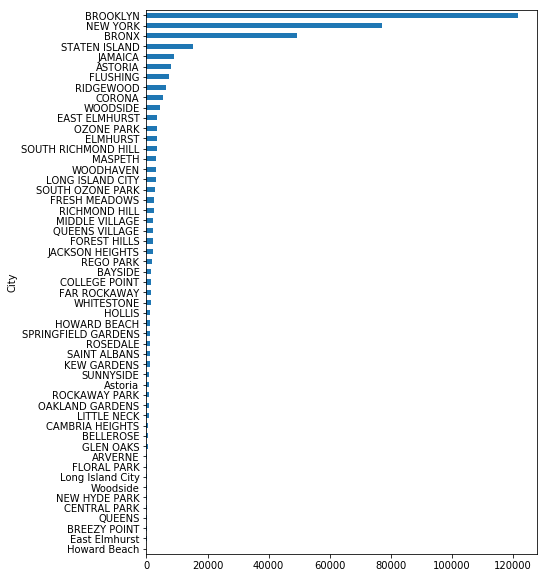

In [84]:
city_comp.unstack().sum(axis=1).sort_values(ascending=True).plot(kind='barh',figsize=(7,10))